# 다중분류
- wine data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()

In [5]:
wine.data.shape

(178, 13)

### 데이터 정규화
- x 는 표준화
- y 는 원핫인코딩

In [6]:
# X 데이터 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [7]:
# y 데이터 원핫 인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, Y, stratify = Y, random_state = seed, test_size = 0.2
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

### 모델 정의 및 설정

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# input_dim = X_data의 열의 수
model = Sequential([
    Dense(30, input_dim = 13, activation = 'relu'),  # 입력층
    Dense(12, activation = 'relu'),
    Dense(3 , activation = 'softmax')
    # 출력층의 노드 수 = Y의 종류 수 / 활성함수 = softmax           
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 다중분류시 손실함수는 categorical_crossentropy
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

### 모델 학습 및 평가

In [13]:
# 모델 학습
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs = 100, batch_size = 100, verbose = 0)

In [14]:
# 모델 평가
model.evaluate(X_test, y_test)
# loss, score
# loss는 별로 안중요함

2/2 [==============================] - 0s 10ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

### 학습과정 시각화

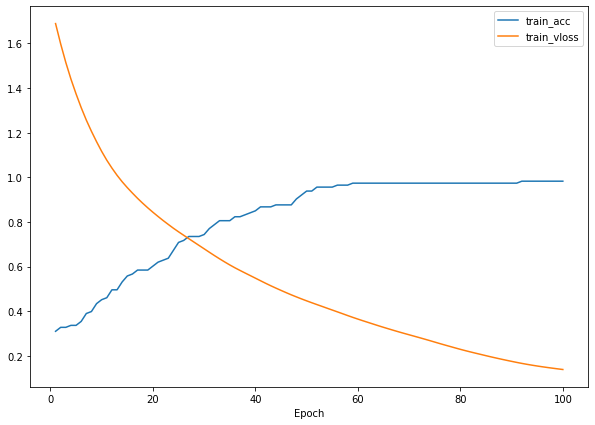

In [16]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize = (10, 7))
plt.plot(xs, y_acc, label = 'train_acc')
plt.plot(xs, y_vloss, label = 'train_vloss')
plt.legend()
plt.xlabel('Epoch')
plt.show()

# 그래프를 통해, 학습을 좀 더 높이면 더 좋아질 가능성이 보임!!
# 아직 고개를 들지 않고 계속 감소중으로 보이기 때문이다.

### Epoch 늘려서 더 학습

In [25]:
model2 = Sequential([
    Dense(30, input_dim = 13, activation = 'relu'), 
    Dense(12, activation = 'relu'),
    Dense(3 , activation = 'softmax')
    # 출력층의 노드 수 = Y의 종류 수 / 활성함수 = softmax           
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 다중분류시 손실함수는 categorical_crossentropy
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [27]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                 epochs = 1000, batch_size = 100, verbose = 0)

In [28]:
model2.evaluate(X_test, y_test)
# 학습이 더 이뤄지고 나니 1.0까지 도달했음.

2/2 [==============================] - 0s 7ms/step - loss: 8.4200e-04 - accuracy: 1.0000


[0.0008420008816756308, 1.0]

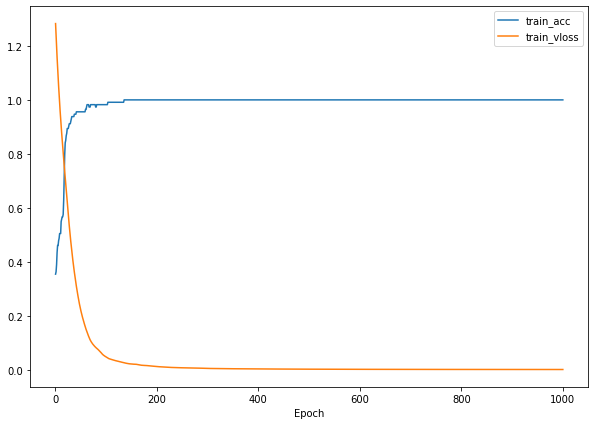

In [29]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

plt.figure(figsize = (10, 7))
plt.plot(xs2, y_acc2, label = 'train_acc')
plt.plot(xs2, y_vloss2, label = 'train_vloss')
plt.legend()
plt.xlabel('Epoch')
plt.show()

# 그래프를 통해, 학습을 좀 더 높이면 더 좋아질 가능성이 보임!!
# 아직 고개를 들지 않고 계속 감소중으로 보이기 때문이다.

## 모델 저장 후 불러오기

In [30]:
model2.save('wine.h5')

In [31]:
!ls -l   # 43kb

total 48
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 43704 May 23 00:42 wine.h5


In [32]:
## tensorflow로 불러오기
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [38]:
my_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 8.4200e-04 - accuracy: 1.0000


[0.0008420008816756308, 1.0]

### 실제값으로 확인해보기

In [44]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [42]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [46]:
my_model.evaluate(wine_std[100], Y[100])
# 차원이 다른 문제가 생김

ValueError: ignored

In [49]:
# 2차원으로 변경
my_model.evaluate(wine_std[100].reshape(1, -1), Y[100].reshape(1, -1))

1/1 [==============================] - 0s 37ms/step - loss: 5.3644e-06 - accuracy: 1.0000


[5.364403477869928e-06, 1.0]

#### model.predict

In [52]:
my_model.predict(wine_std[100].reshape(1, -1))

array([[5.2849582e-06, 9.9999464e-01, 1.4567556e-07]], dtype=float32)

In [57]:
my_model.predict(wine_std[100].reshape(1, -1)).argmax()
# 1번째 값이 가장 크다는 의미 == class_1

1